# <font color=blue>Assignments for "Assumptions of Linear Regression"</font>

To close out this lesson, you'll do two assignments. Both require you to create Jupyter notebooks. Please submit a link to a single Gist file that contains links to the two notebooks.

## 1. Predicting temperature

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. You will download the dataset from [Kaggle](https://www.kaggle.com/budincsevity/szeged-weather/home). To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

- First, load the dataset from Kaggle.



In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [2]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [3]:
pd.set_option('display.max_columns', 500)
df = pd.read_csv('/Users/melisademir/Desktop/Reg_Assign_1/weather.csv', encoding="ISO-8859-1", low_memory=False)
df.tail(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96443,2016-09-09 14:00:00.000 +0200,Partly Cloudy,rain,30.894444,29.450000,0.28,14.7798,43.0,15.5526,0.0,1014.66,Partly cloudy starting in the morning.
96444,2016-09-09 15:00:00.000 +0200,Partly Cloudy,rain,31.083333,29.616667,0.28,15.5043,40.0,16.1000,0.0,1014.17,Partly cloudy starting in the morning.
96445,2016-09-09 16:00:00.000 +0200,Partly Cloudy,rain,31.083333,29.611111,0.28,13.8943,40.0,16.1000,0.0,1013.97,Partly cloudy starting in the morning.
96446,2016-09-09 17:00:00.000 +0200,Partly Cloudy,rain,30.766667,29.311111,0.28,14.2163,24.0,15.5526,0.0,1013.83,Partly cloudy starting in the morning.
96447,2016-09-09 18:00:00.000 +0200,Partly Cloudy,rain,28.838889,27.850000,0.32,12.2038,21.0,16.1000,0.0,1014.07,Partly cloudy starting in the morning.
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [4]:
display(df.isnull().sum().sort_values(ascending=False))

Precip Type                 517
Daily Summary                 0
Pressure (millibars)          0
Loud Cover                    0
Visibility (km)               0
Wind Bearing (degrees)        0
Wind Speed (km/h)             0
Humidity                      0
Apparent Temperature (C)      0
Temperature (C)               0
Summary                       0
Formatted Date                0
dtype: int64

In [5]:
df = df.drop('Precip Type', axis =1)

In [6]:
display(df.isnull().sum().sort_values(ascending=False))

Daily Summary               0
Pressure (millibars)        0
Loud Cover                  0
Visibility (km)             0
Wind Bearing (degrees)      0
Wind Speed (km/h)           0
Humidity                    0
Apparent Temperature (C)    0
Temperature (C)             0
Summary                     0
Formatted Date              0
dtype: int64

- Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing* and *pressure*. Estimate the model using OLS.

In [7]:
Y = df['Temperature (C)'] #target
X = df[['Wind Bearing (degrees)','Wind Speed (km/h)', 'Pressure (millibars)','Humidity']]

In [8]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression()

In [9]:
# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 4.04836936e-03 -2.01413742e-01 -6.91759209e-04 -3.24962454e+01]

Intercept: 
 37.92643818528443


In [10]:
predictions = lrm.predict(df[['Wind Bearing (degrees)','Wind Speed (km/h)', 'Pressure (millibars)','Humidity']])

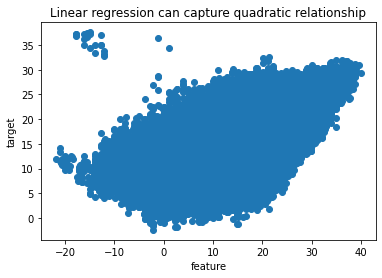

In [11]:
plt.scatter(df['Temperature (C)'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

### the error term should be zero on average

In [12]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the temperature model is: {}".format(np.mean(errors)))   #bagimsiz degiskende 1 birim degisim bagimli degiskende 4+ artisa neden olmaktadir.

Mean of the errors in the temperature model is: 4.843621751135433e-16


### homoscedasticity

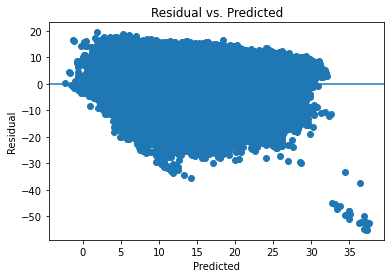

In [13]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [14]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0



The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

### error terms should be uncorrelated with one other

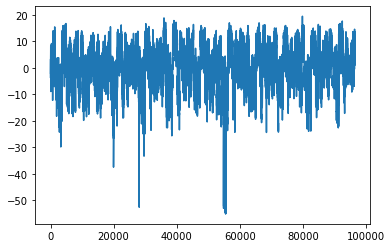

In [15]:
plt.plot(errors)
plt.show()

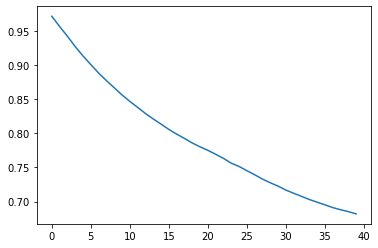

In [16]:

from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

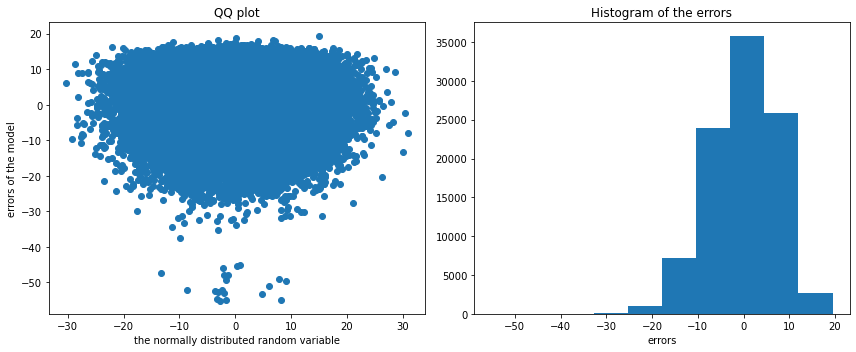

In [17]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [18]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [19]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.2967352519513 and p value is 0.0
Normality test statistics is 3375.432307699263 and p value is 0.0


The p-values of both tests indicate that our errors are not normally distributed.

In [20]:
X = sm.add_constant(X)
sonuclar = sm.OLS(Y, X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Mon, 21 Sep 2020   Prob (F-statistic):               0.00
Time:                        01:31:21   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

## 2. House prices

To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

- Load the **houseprices** data from Kaggle. 
- Reimplement the model you built in the previous lesson. 
- Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.

In [21]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [22]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [23]:
pd.set_option('display.max_columns', 500)
house = pd.read_csv('/Users/melisademir/Desktop/Reg_Assign_1/house.csv', encoding="ISO-8859-1", low_memory=False)
house.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,32,45,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,CemntBd,CmentBd,Stone,194.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1573,1573,GasA,Ex,Y,SBrkr,1578,0,0,1578,0,0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3,840,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,1

In [24]:
missing_value_percent = house.isnull().sum()/house.shape[0] * 100
missing_value_percent.sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
                   ...    
CentralAir        0.000000
SaleCondition     0.000000
Heating           0.000000
TotalBsmtSF       0.000000
Id                0.000000
Length: 81, dtype: float64

In [25]:
null_value_clm_greater_20 = missing_value_percent[missing_value_percent > 20].keys()
null_value_clm_greater_20

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [26]:
house = house.drop(null_value_clm_greater_20, axis =1)

In [27]:
num_var = house.select_dtypes(include=['int64','float64']).columns
cat_var = house.select_dtypes(include=['object']).columns
missing_col = house.columns[house.isnull().any()]

In [28]:
isnull_per = house.select_dtypes(include=['object']).isnull().mean()*100
miss_vars = isnull_per[isnull_per >0].keys()
miss_vars

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [29]:
for var in miss_vars:
    house[var].fillna(house[var].mode()[0],inplace=True)
    print(var,"=",house[var].mode()[0])

MasVnrType = None
BsmtQual = TA
BsmtCond = TA
BsmtExposure = No
BsmtFinType1 = Unf
BsmtFinType2 = Unf
Electrical = SBrkr
GarageType = Attchd
GarageFinish = Unf
GarageQual = TA
GarageCond = TA


In [30]:
house.select_dtypes(include=['object']).isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [31]:
house.select_dtypes(include=['int64','float64']).isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [32]:
house['LotFrontage'] = house['LotFrontage'].fillna(house['LotFrontage'].median())
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(house['GarageYrBlt'].median())
house['MasVnrArea'] = house['MasVnrArea'].fillna(house['MasVnrArea'].median())

In [33]:
display(house.isnull().sum().sort_values(ascending=False))

SalePrice       0
ExterCond       0
RoofStyle       0
RoofMatl        0
Exterior1st     0
               ..
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Id              0
Length: 76, dtype: int64

In [34]:
#X,y = house.drop('SalePrice', axis=1), house.SalePrice

Y_h = house['SalePrice']
X_h = house[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]
lrm.fit(X_h, Y_h)

LinearRegression()

In [35]:
print('coef: \n', lrm.coef_)
print('intercept (bias): \n', lrm.intercept_)

coef: 
 [23572.23563223    45.64315247 18582.20858995    32.52033744]
intercept (bias): 
 -99248.85289101172


In [36]:
X_h = sm.add_constant(X_h)
results_h = sm.OLS(Y_h, X_h).fit()
results_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     1156.
Date:                Mon, 21 Sep 2020   Prob (F-statistic):               0.00
Time:                        01:31:21   Log-Likelihood:                -17500.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1455   BIC:                         3.504e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.925e+04   4639.866    -21.390      0.000   -1.08e+05   -9.01e+04
OverallQual  2.357e+04   1072.465     21.980      0.000    2.15e+04    2.57e+04
GrLivArea      45.6432      2.484     18.376      0.000      40.771      50.515
GarageCars   1.858e+04   1747.412     10.634      0.000    1.52e+04     2.2e+04
TotalBsmtSF    32.5203      2.838     11.459      0.000      26.953      38.087
==============================================================================
Omnibus:                      421.692   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36798.858
Skew:                          -0.273   Prob(JB):                         0.00
Kurtosis:                      27.589   Cond. No.                     8.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
predictions_h = lrm.predict(house[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']])
predictions_h

array([208808.4132837 , 177991.30234567, 214358.59446741, ...,
       228607.41063095, 121454.77598049, 135367.87718404])

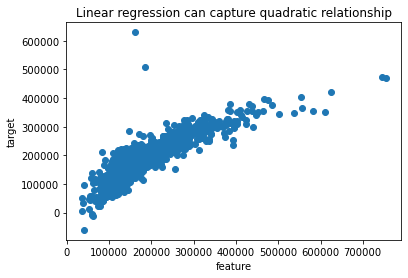

In [38]:
plt.scatter(house['SalePrice'], predictions_h)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

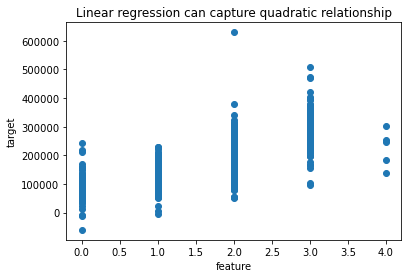

In [39]:
plt.scatter(house['GarageCars'], predictions_h)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

### the error term should be zero on average

In [40]:
predictions_h = lrm.predict(house[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']])
errors_h = Y_h - predictions_h

print("Mean of the errors in the temperature model is: {}".format(np.mean(errors_h))) 

Mean of the errors in the temperature model is: -2.390102240933131e-11


### homoscedasticity

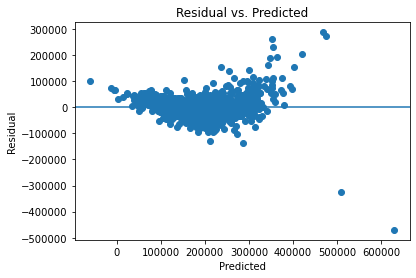

In [41]:
plt.scatter(predictions_h, errors_h)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [42]:
bart_stats_h = bartlett(predictions_h, errors_h)
lev_stats_h = levene(predictions_h, errors_h)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats_h[0], bart_stats_h[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats_h[0], lev_stats_h[1]))

Bartlett test statistic value is 462.59 and p value is 1.31e-102
Levene test statistic value is 447.225 and p value is 1.79e-92


The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

### error terms should be uncorrelated with one other

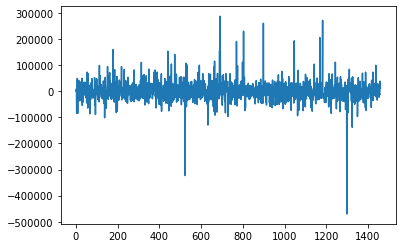

In [43]:
plt.plot(errors_h)
plt.show()

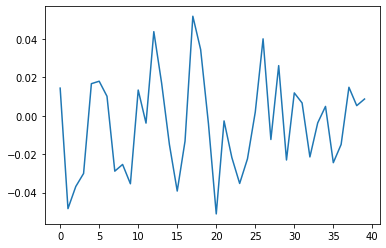

In [44]:
acf_data_h = acf(errors_h)

plt.plot(acf_data_h[1:])
plt.show()

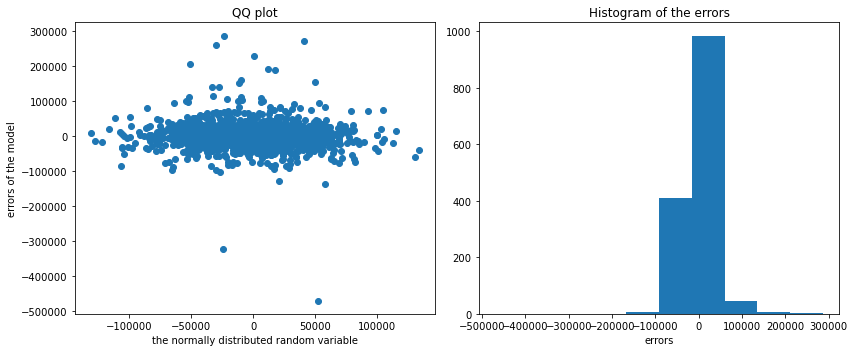

In [45]:
rand_nums_h = np.random.normal(np.mean(errors_h), np.std(errors_h), len(errors_h))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums_h, errors_h)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors_h)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [46]:
jb_stats_h = jarque_bera(errors_h)
norm_stats_h = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats_h[0], jb_stats_h[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats_h[0], norm_stats_h[1]))

Jarque-Bera test statistics is 36798.85814894245 and p value is 0.0
Normality test statistics is 3375.432307699263 and p value is 0.0


The p-values of both tests indicate that our errors are not normally distributed.